In [ ]:
#Install Dependencies

%pip install -r requirements.txt
!brew reinstall graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
==> Downloading https://ghcr.io/v2/homebrew/core/graphviz/manifests/12.2.1
Already downloaded: /Users/rishavganguly/Library/Caches/Homebrew/downloads/5502229fbe57ccc153b4156e0789eba6cb738dadc42ea699ff6f0ed0dd0f315c--graphviz-12.2.1.bottle_manifest.json
==> Fetching graphviz
==> Downloading https://ghcr.io/v2/homebrew/core/graphviz/blobs/sha256:1021bca3a
Already downloaded: /Users/rishavganguly/Library/Caches/Homebrew/downloads/02c4e427c8d6745ad31d8fac648937b9fc125c4cd1c988f45be11a25ea9c07f3--graphviz--12.2.1.arm64_sequoia.bottle.tar.gz
==> Reinstalling graphviz 
==> Pouring graphviz--12.2.1.arm64_sequoia.bottle.tar.gz
🍺  /opt/homebrew/Cellar/graphviz/12.2.1: 283 files, 7.8MB
==> Running `brew cleanup graphviz`...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints

In [2]:
#Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import pydot

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import pydot
import graphviz
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

from zipfile import ZipFile


In [4]:
#Define path to images
path = './lung_image_sets'

classes = os.listdir(path)

classes

['lung_aca', 'lung_n', 'lung_scc']

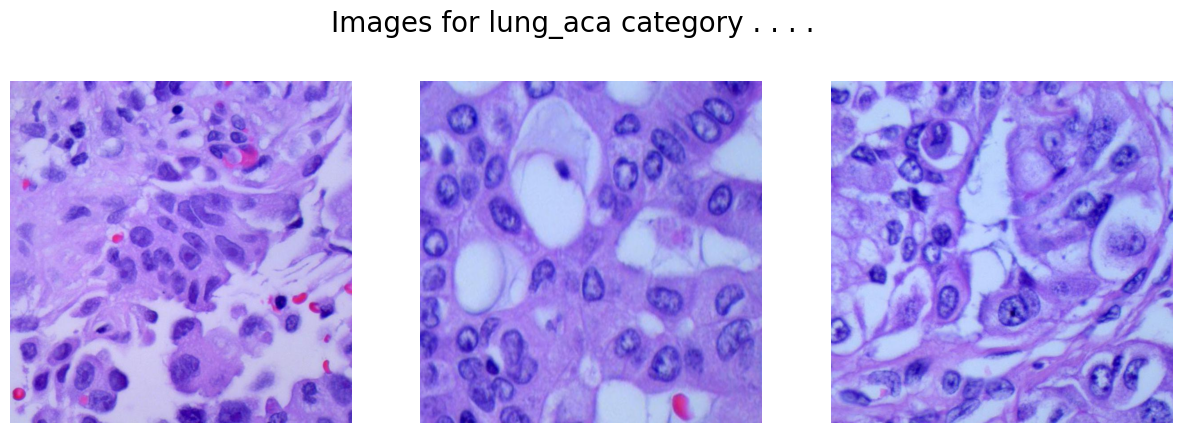

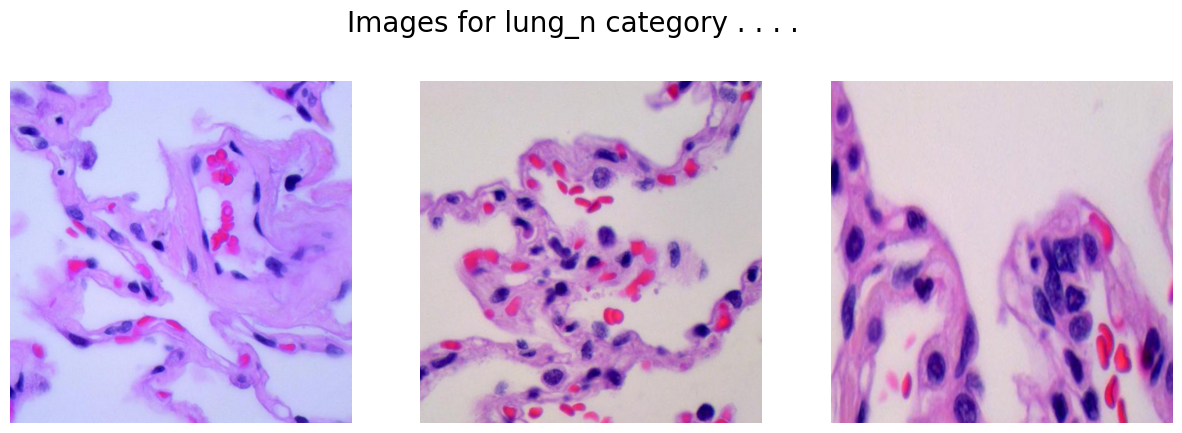

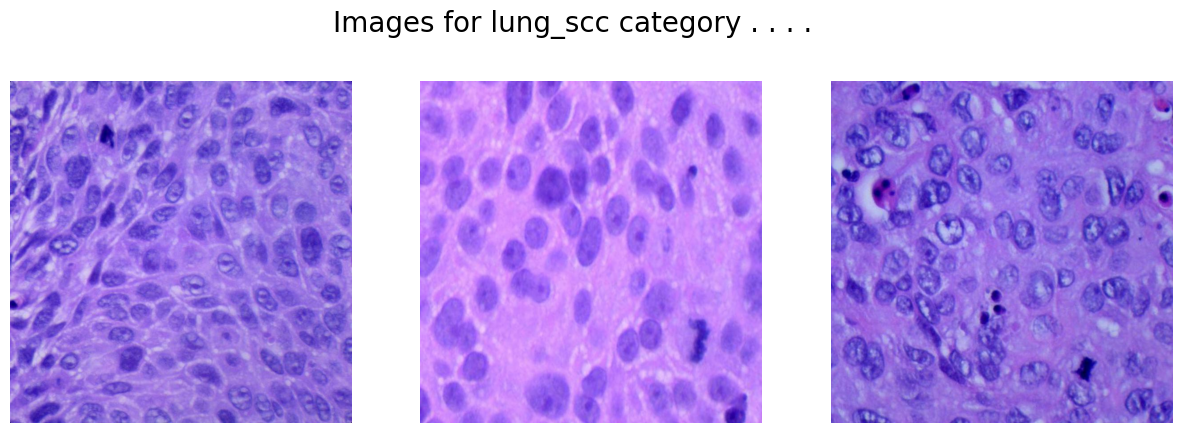

In [ ]:
# Display 3 random sample images from each class

for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()

In [6]:
# Define model hyperparameters

IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

In [ ]:
# Load and preprocess images into training and validation sets

X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'{path}/{cat}/*.jpeg')

    for image in images:
        img = cv2.imread(image)
        
        X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
        Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y, test_size = SPLIT, random_state = 2022)
print(X_train.shape, X_val.shape)



(12000, 256, 256, 3) (3000, 256, 256, 3)


In [8]:
# Normalize pixel values and split data into train/validation sets

model = keras.models.Sequential([
	layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

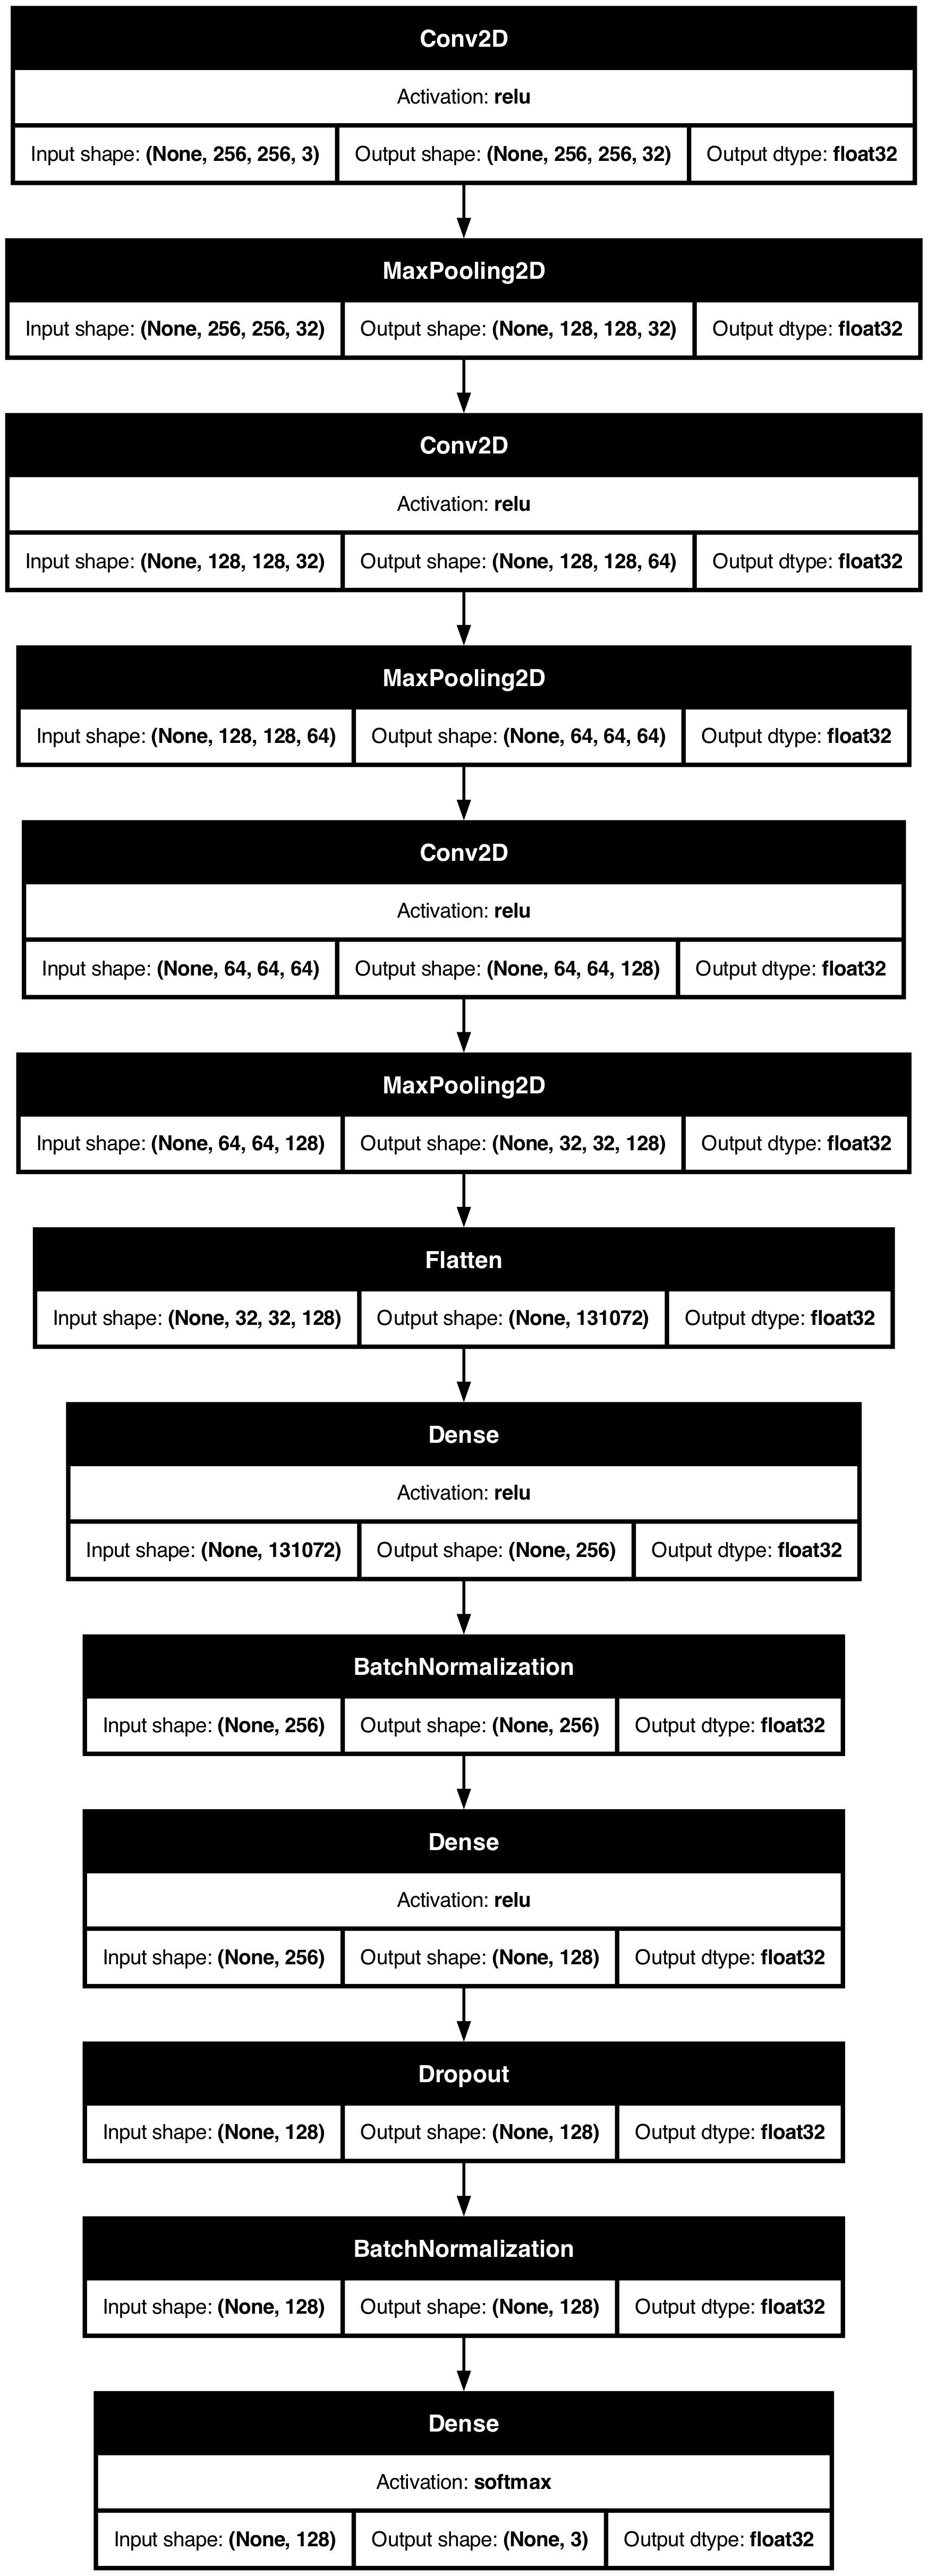

In [ ]:
# Define CNN model

keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [10]:
# Define model compilation parameters

model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)


In [11]:
# Define callbacks for early stopping, learning rate reduction and custom accuracy threshold

from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_accuracy') > 0.90:
			print('\n Validation accuracy has reached upto \
					90% so, stopping further training.')
			self.model.stop_training = True


es = EarlyStopping(patience=3,
				monitor='val_accuracy',
				restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)


In [12]:
# Train model with early stopping, learning rate reduction and custom accuracy threshold callbacks

history = model.fit(X_train, Y_train,
					validation_data = (X_val, Y_val),
					batch_size = BATCH_SIZE,
					epochs = EPOCHS,
					verbose = 1,
					callbacks = [es, lr, myCallback()])


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 651s 3s/step - accuracy: 0.7920 - loss: 0.5116 - val_accuracy: 0.3257 - val_loss: 13.4441 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 730s 4s/step - accuracy: 0.9016 - loss: 0.2439 - val_accuracy: 0.3603 - val_loss: 36.3350 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9386 - loss: 0.1614
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 710s 4s/step - accuracy: 0.9386 - loss: 0.1615 - val_accuracy: 0.3247 - val_loss: 24.8710 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 641s 3s/step - accuracy: 0.9550 - loss: 0.1206 - val_accuracy: 0.6520 - val_loss: 2.6516 - learning_rate: 5.0000e-04
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 654s 3s/step - accuracy: 0.9727 - loss: 0.0832 - val_accuracy: 0.7760 - val_loss: 0.7185 - learning_rate: 5.0000e-04
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.9744 - 

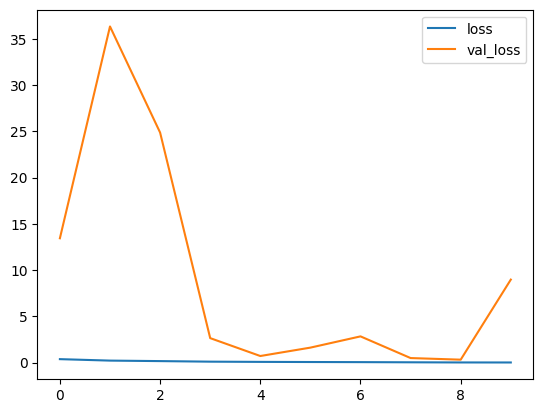

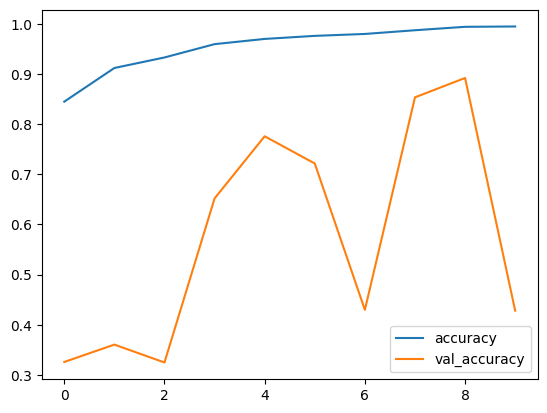

In [13]:
# Summarize training history by plotting loss and accuracy curves

history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [14]:
# Evaluate model performance on validation set  

Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)
metrics.confusion_matrix(Y_val, Y_pred)


94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 269ms/step


array([[826,   0, 161],
       [ 86, 884,   7],
       [ 69,   0, 967]])

In [15]:
# Print classification report for model performance

print(metrics.classification_report(Y_val, Y_pred, target_names=classes))

              precision    recall  f1-score   support

    lung_aca       0.84      0.84      0.84       987
      lung_n       1.00      0.90      0.95       977
    lung_scc       0.85      0.93      0.89      1036

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.89      0.89      3000

